# Data Visualization Assignment (Matplotlib & Seaborn)
Author: Katie Sylvia

Data set in the data folder as `auto_mpg_dataset.csv`. Dataset is of cars from the 1970s and 1980s.<br>
Data from: https://www.mldata.io/datasets-sort/regression/<br>

In [39]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# Read in the data
cars = pd.read_csv('data/auto_mpg_dataset.csv')
cars

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg
0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,18.0
1,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,15.0
2,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,18.0
3,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,16.0
4,8,302.0,140.0,3449.0,10.5,70,1,ford torino,17.0
...,...,...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl,27.0
394,4,97.0,52.0,2130.0,24.6,82,2,vw pickup,44.0
395,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage,32.0
396,4,120.0,79.0,2625.0,18.6,82,1,ford ranger,28.0


In [30]:
# Display the first 5 rows
cars.head(5)

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg
0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,18.0
1,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,15.0
2,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,18.0
3,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,16.0
4,8,302.0,140.0,3449.0,10.5,70,1,ford torino,17.0


In [31]:
# Summary statistics (using .describe())
cars.describe().round(2)

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
count,398.00,398.00,398.00,398.00,398.00,398.00,398.00,398.00
mean,5.45,193.43,-1404.64,2970.42,15.57,76.01,1.57,23.51
std,1.70,104.27,12213.42,846.84,2.76,3.70,0.80,7.82
min,3.00,68.00,-100000.00,1613.00,8.00,70.00,1.00,9.00
25%,4.00,104.25,75.00,2223.75,13.82,73.00,1.00,17.50
50%,4.00,148.50,92.00,2803.50,15.50,76.00,1.00,23.00
75%,8.00,262.00,125.00,3608.00,17.18,79.00,2.00,29.00
max,8.00,455.00,230.00,5140.00,24.80,82.00,3.00,46.60


## Data Cleaning

In [32]:
# Check the datatypes
cars.dtypes

cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model_year        int64
origin            int64
car_name         object
mpg             float64
dtype: object

In [33]:
# Check for null values
cars.info()
cars.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     398 non-null    int64  
 1   displacement  398 non-null    float64
 2   horsepower    398 non-null    float64
 3   weight        398 non-null    float64
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
 6   origin        398 non-null    int64  
 7   car_name      398 non-null    object 
 8   mpg           398 non-null    float64
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
mpg             0
dtype: int64

In [34]:
# Drop the non-numerical column
cars.drop(columns = 'car_name', inplace = True)
cars

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
0,8,307.0,130.0,3504.0,12.0,70,1,18.0
1,8,350.0,165.0,3693.0,11.5,70,1,15.0
2,8,318.0,150.0,3436.0,11.0,70,1,18.0
3,8,304.0,150.0,3433.0,12.0,70,1,16.0
4,8,302.0,140.0,3449.0,10.5,70,1,17.0
...,...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790.0,15.6,82,1,27.0
394,4,97.0,52.0,2130.0,24.6,82,2,44.0
395,4,135.0,84.0,2295.0,11.6,82,1,32.0
396,4,120.0,79.0,2625.0,18.6,82,1,28.0


## Correlations

In [37]:
# Get correlations for numeric data
cars_corr = cars.corr(numeric_only = True)
cars_corr

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
cylinders,1.000000,0.950721,0.084291,0.896017,-0.505419,-0.348746,-0.562543,-0.775396
displacement,0.950721,1.000000,0.079333,0.932824,-0.543684,-0.370164,-0.609409,-0.804203
horsepower,0.084291,0.079333,1.000000,0.071114,-0.080685,-0.067952,0.035575,-0.073501
weight,0.896017,0.932824,0.071114,1.000000,-0.417457,-0.306564,-0.581024,-0.831741
acceleration,-0.505419,-0.543684,-0.080685,-0.417457,1.000000,0.288137,0.205873,0.420289
model_year,-0.348746,-0.370164,-0.067952,-0.306564,0.288137,1.000000,0.180662,0.579267
origin,-0.562543,-0.609409,0.035575,-0.581024,0.205873,0.180662,1.000000,0.563450
mpg,-0.775396,-0.804203,-0.073501,-0.831741,0.420289,0.579267,0.563450,1.000000


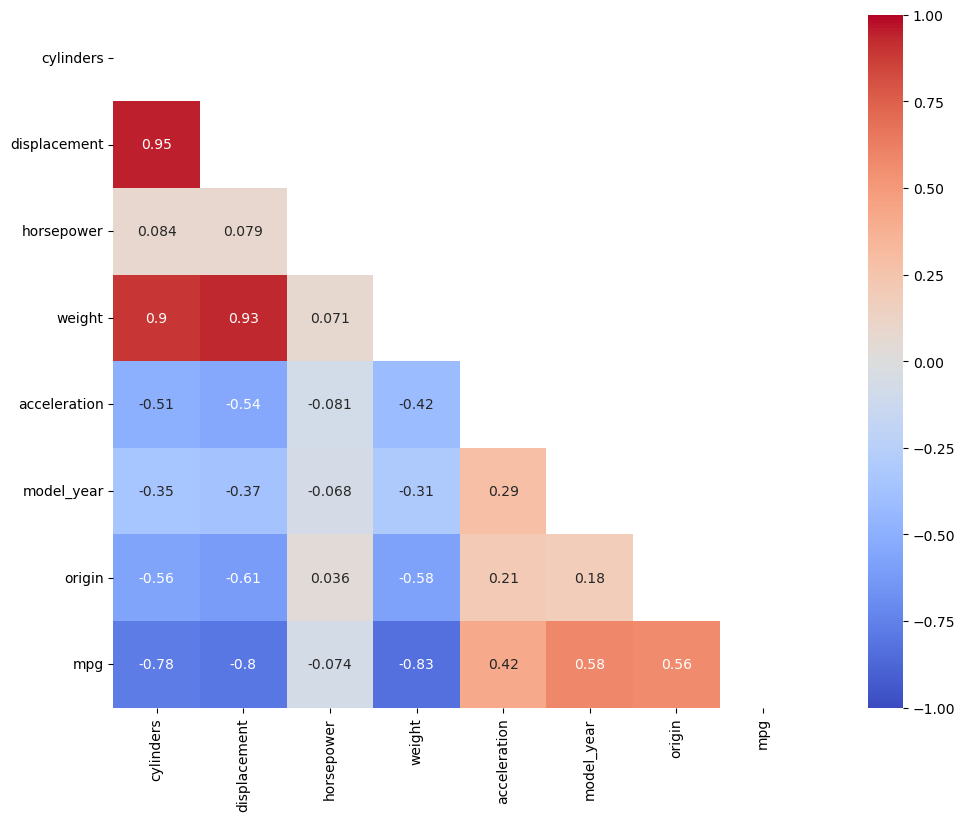

In [47]:
# Create a heatmap

# Size
plt.figure(figsize = (16,9))

# Get a correlation of variables
cars_corr 

# Set up a mask to be "True" in the upper triangle:
mask = np.zeros_like(cars_corr)
mask[np.triu_indices_from(mask)] = True

# Plot our correlation heat map
sns.heatmap(cars_corr, square = True, cmap = 'coolwarm', annot = True, vmax = 1, vmin = -1, mask = mask);


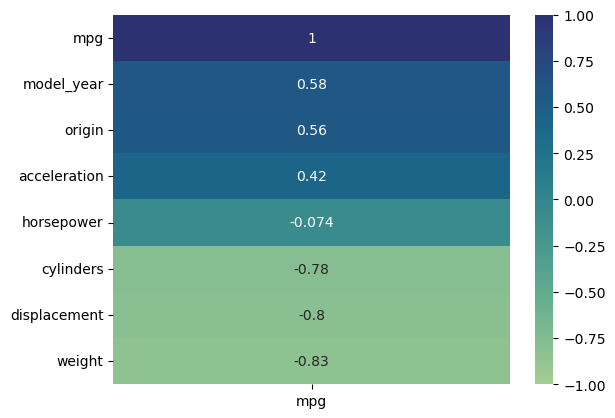

In [57]:
# What if we ONLY wanted to look at how the features correlate with `mpg`?

sns.heatmap(cars.corr(numeric_only=True)[['mpg']].sort_values(by = 'mpg', ascending = False), 
                                                            annot = True, 
                                                            vmax = 1,
                                                            vmin = -1,
                                                            cmap = 'crest');


For more Seaborn color palettes, click [here](https://seaborn.pydata.org/tutorial/color_palettes.html).

## Countplots

**Distribution of Model Year**

In [63]:
cars

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
0,8,307.0,130.0,3504.0,12.0,70,1,18.0
1,8,350.0,165.0,3693.0,11.5,70,1,15.0
2,8,318.0,150.0,3436.0,11.0,70,1,18.0
3,8,304.0,150.0,3433.0,12.0,70,1,16.0
4,8,302.0,140.0,3449.0,10.5,70,1,17.0
...,...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790.0,15.6,82,1,27.0
394,4,97.0,52.0,2130.0,24.6,82,2,44.0
395,4,135.0,84.0,2295.0,11.6,82,1,32.0
396,4,120.0,79.0,2625.0,18.6,82,1,28.0


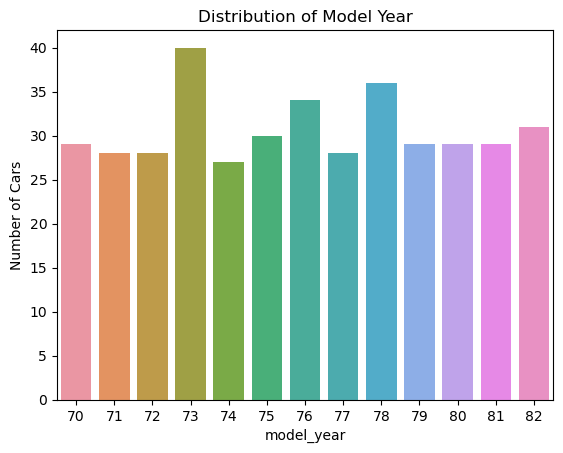

In [90]:
# Seaborn

sns.countplot(x = cars['model_year'])

plt.title('Distribution of Model Year')

plt.ylabel('Number of Cars');

**Distribution of Origin**

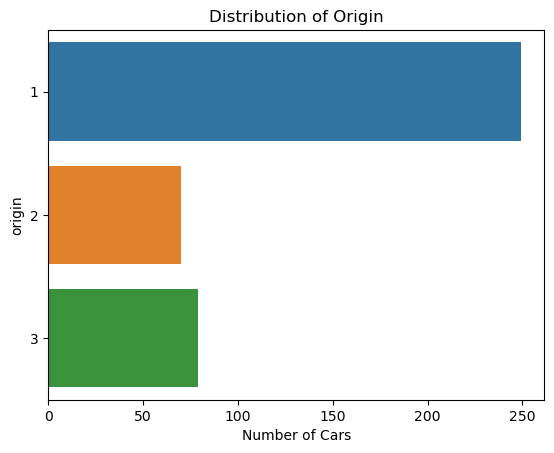

In [115]:
# Seaborn

sns.countplot(y = cars['origin'])

plt.title('Distribution of Origin')

plt.xlabel('Number of Cars');

**Distribution of Cylinders**

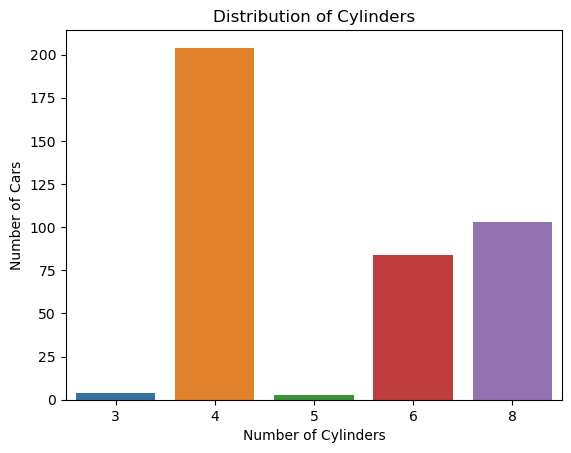

In [116]:
# Seaborn

sns.countplot(x = cars['cylinders'])

plt.title('Distribution of Cylinders')

plt.xlabel('Number of Cylinders')
plt.ylabel('Number of Cars');

## Boxplots/Histograms

**MPG Distribution**

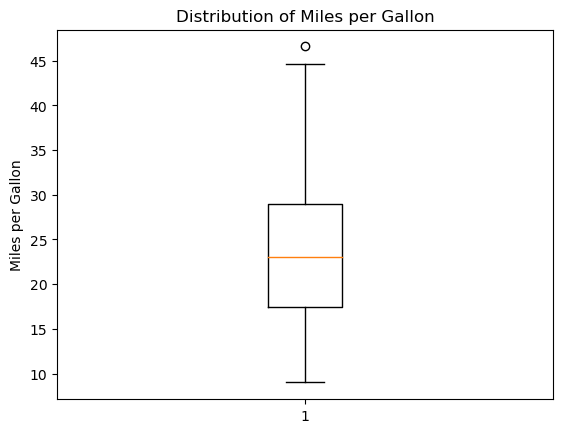

In [117]:
#MatPlotLib - Boxplot

plt.boxplot(cars['mpg'])

plt.title('Distribution of Miles per Gallon')

plt.ylabel('Miles per Gallon');


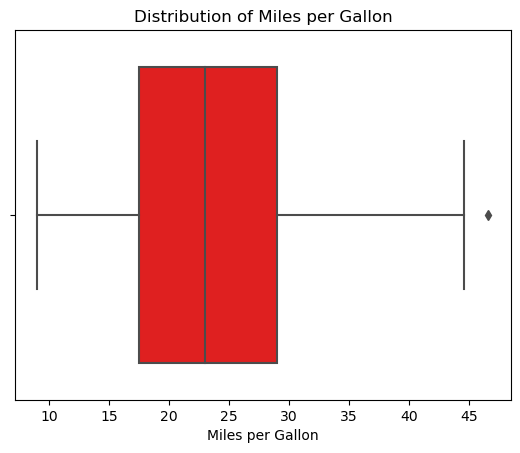

In [118]:
# Seaborn - Boxplot

sns.boxplot(x = cars['mpg'], color = 'red')

plt.title('Distribution of Miles per Gallon')
plt.xlabel('Miles per Gallon');

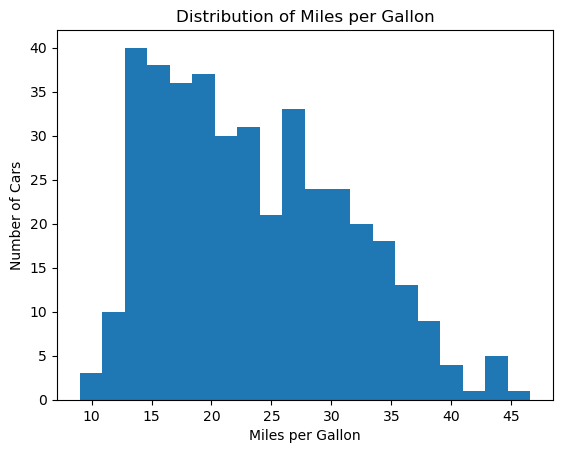

In [119]:
# MatPlotLib - Histogram

plt.hist(cars['mpg'], bins = 20)

plt.title('Distribution of Miles per Gallon')

plt.xlabel('Miles per Gallon')
plt.ylabel('Number of Cars');

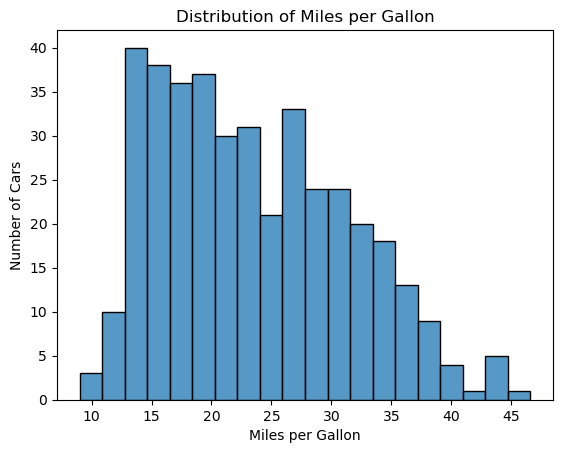

In [122]:
# Seaborn - Histogram

sns.histplot(cars['mpg'], bins = 20)

plt.title('Distribution of Miles per Gallon')

plt.xlabel('Miles per Gallon')
plt.ylabel('Number of Cars');



**Weight Distribution**

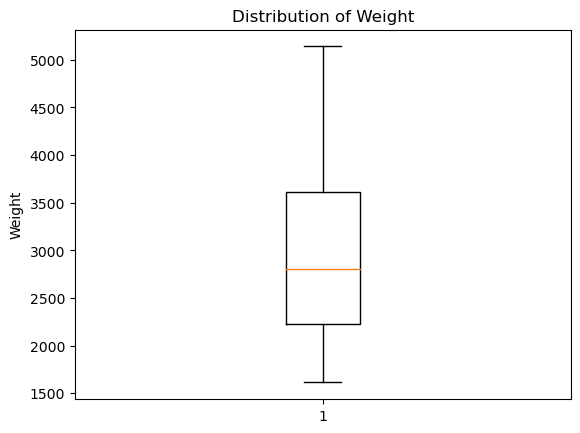

In [178]:
#MatPlotLib - Boxplot

plt.boxplot(cars['weight'])

plt.title('Distribution of Weight')

plt.ylabel('Weight');

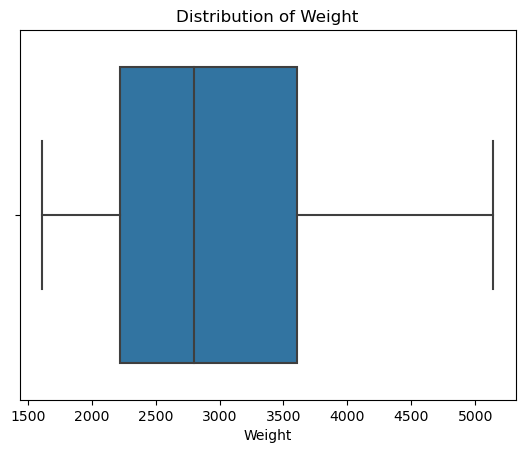

In [128]:
# Seaborn - Boxplot

sns.boxplot(x = cars['weight'])

plt.title('Distribution of Weight')

plt.xlabel('Weight');

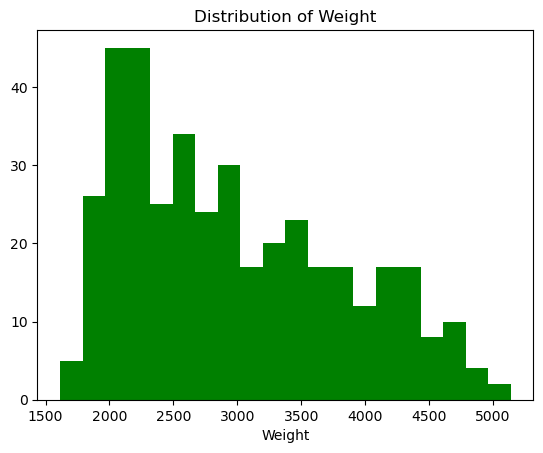

In [135]:
#MatPlotLib - Histogram

plt.hist(cars['weight'], color = 'green', bins = 20)

plt.title('Distribution of Weight')

plt.xlabel('Weight');

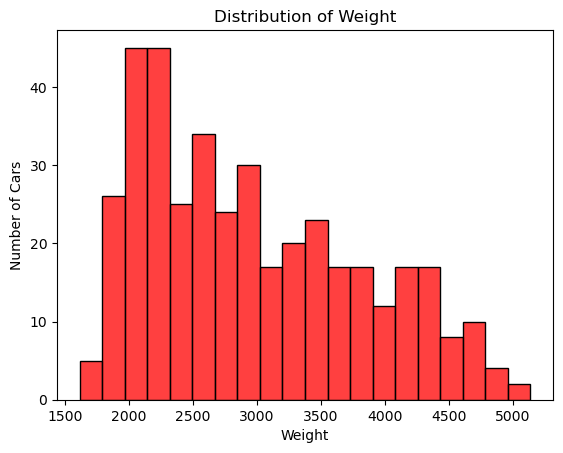

In [134]:
# Seaborn - Histogram

sns.histplot(cars['weight'], color = 'red', bins = 20)

plt.title('Distribution of Weight')

plt.xlabel('Weight')
plt.ylabel('Number of Cars');

## Scatterplots

**Weight vs. MPG**

In [140]:
cars

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
0,8,307.0,130.0,3504.0,12.0,70,1,18.0
1,8,350.0,165.0,3693.0,11.5,70,1,15.0
2,8,318.0,150.0,3436.0,11.0,70,1,18.0
3,8,304.0,150.0,3433.0,12.0,70,1,16.0
4,8,302.0,140.0,3449.0,10.5,70,1,17.0
...,...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790.0,15.6,82,1,27.0
394,4,97.0,52.0,2130.0,24.6,82,2,44.0
395,4,135.0,84.0,2295.0,11.6,82,1,32.0
396,4,120.0,79.0,2625.0,18.6,82,1,28.0


C:\Users\adoro\AppData\Local\Temp\ipykernel_8180\1130090743.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = cars['mpg'],


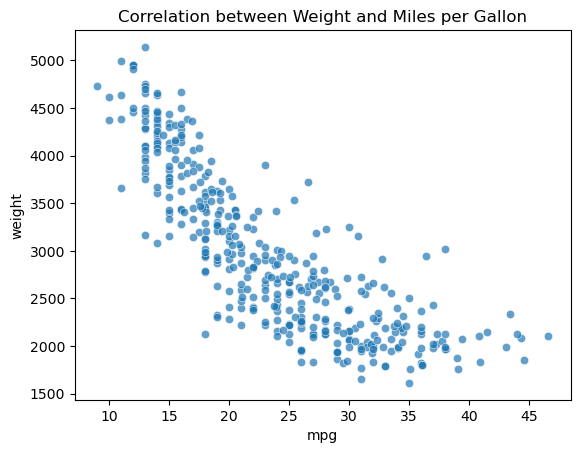

In [154]:
#Seaborn

sns.scatterplot(x = cars['mpg'],
                y = cars['weight'],
                palette = ['blue', 'red'],
                alpha = .7)

plt.title('Correlation between Weight and Miles per Gallon');

## Your turn!

In [155]:
cars

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
0,8,307.0,130.0,3504.0,12.0,70,1,18.0
1,8,350.0,165.0,3693.0,11.5,70,1,15.0
2,8,318.0,150.0,3436.0,11.0,70,1,18.0
3,8,304.0,150.0,3433.0,12.0,70,1,16.0
4,8,302.0,140.0,3449.0,10.5,70,1,17.0
...,...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790.0,15.6,82,1,27.0
394,4,97.0,52.0,2130.0,24.6,82,2,44.0
395,4,135.0,84.0,2295.0,11.6,82,1,32.0
396,4,120.0,79.0,2625.0,18.6,82,1,28.0


In [167]:
vehicle = pd.read_csv('data/auto_mpg_dataset.csv')
vehicle

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg
0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,18.0
1,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,15.0
2,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,18.0
3,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,16.0
4,8,302.0,140.0,3449.0,10.5,70,1,ford torino,17.0
...,...,...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl,27.0
394,4,97.0,52.0,2130.0,24.6,82,2,vw pickup,44.0
395,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage,32.0
396,4,120.0,79.0,2625.0,18.6,82,1,ford ranger,28.0


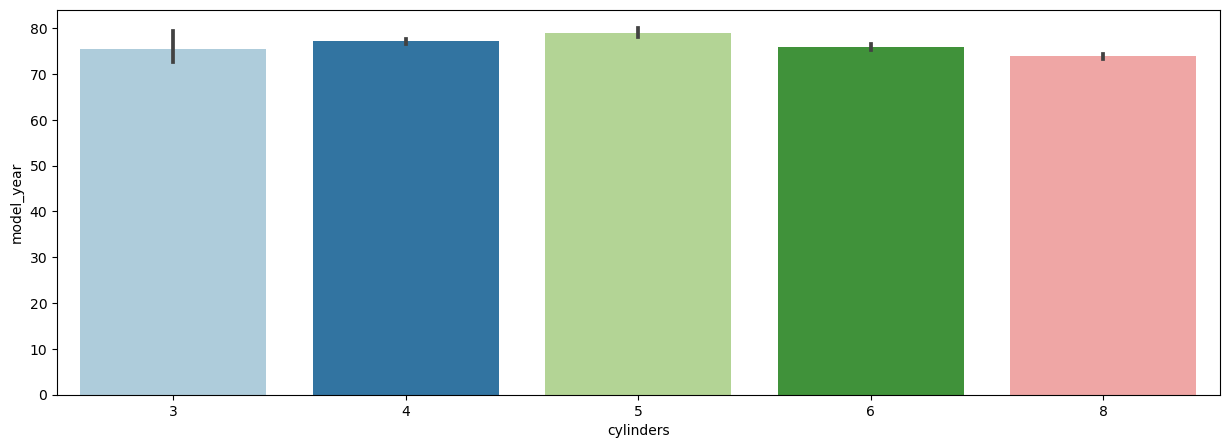

In [177]:
plt.figure(figsize = (15,5))

# Bar Chart
sns.barplot(x = vehicle['cylinders'], y = vehicle['model_year'], palette = 'Paired');